# Poisson Equation in 2D

In [1]:
import jax
import anon
import anabel
import anabel.backend as anp
from interpolate import lagrange_t6
from poisson import poisson2 as poisson
from poisson import H1_v1 as H1
from poisson import L2 
jax.config.update("jax_enable_x64", True)

In [2]:
norm = "H1"

Source term, $f$:

In [3]:
# pblm = ""

# def u(x): 
#     x = x.flatten()
#     return 1-x[0]**2 - x[1]**2

# f=lambda x: 4.0

In [4]:
pblm = "-b"
PI = anp.pi
def u(x): 
    return anp.cos(PI/2*anp.linalg.norm(x))

f = lambda x: PI**2/4*(anp.cos(PI*anp.linalg.norm(x)/2)+anp.sinc(PI*anp.linalg.norm(x)/2))

In [5]:
import anon.diff as diff
from anabel.template import template

mesh 1, order 2


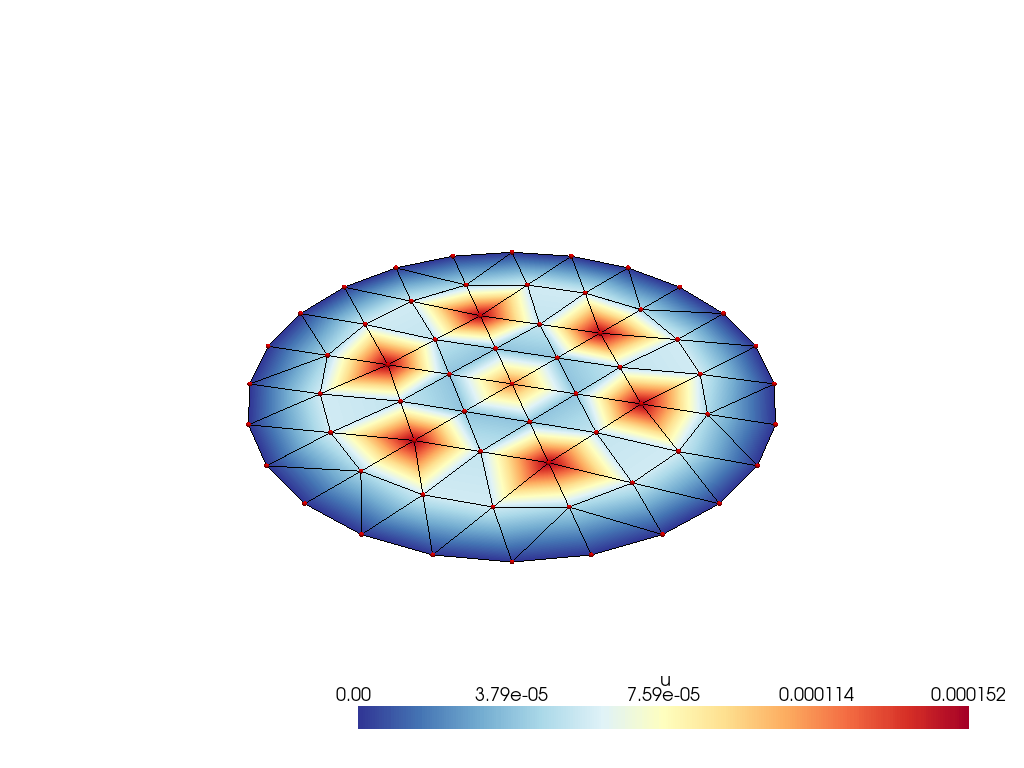

mesh 1, order 5


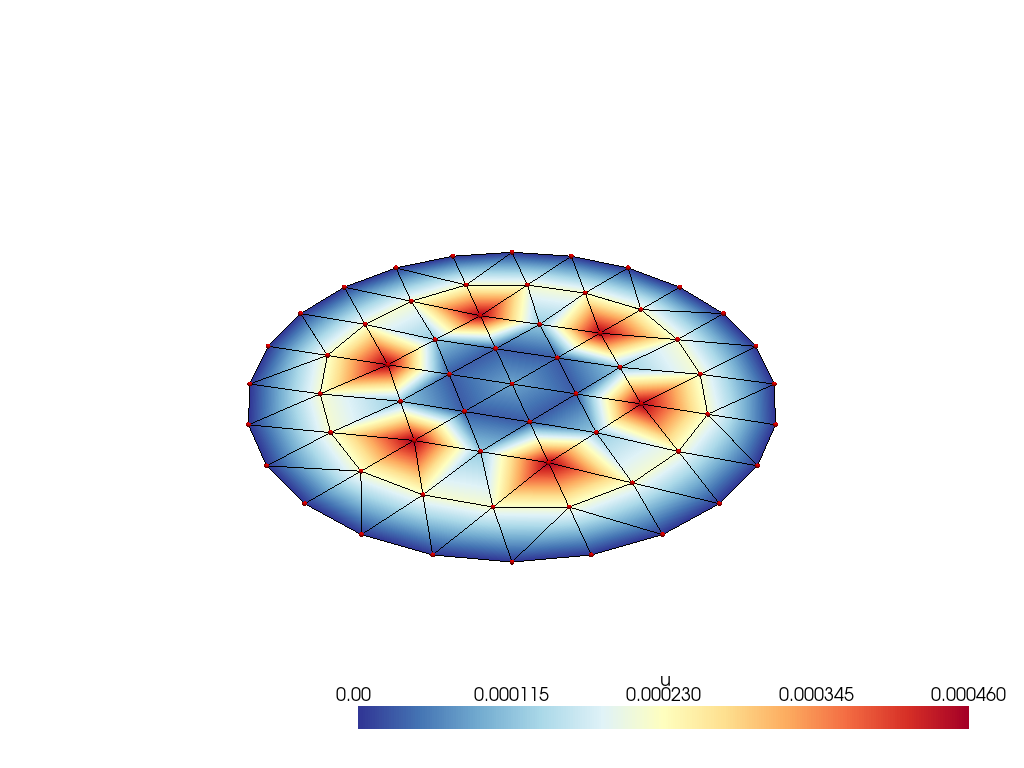

mesh 1, order 8


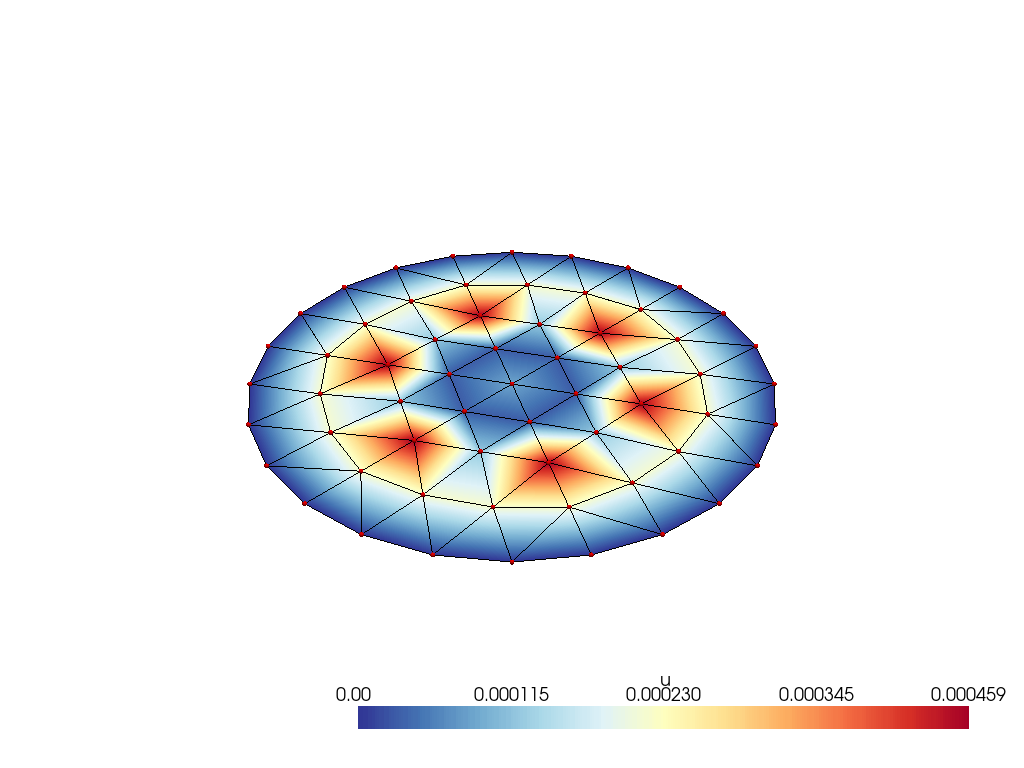

mesh 1, order 13


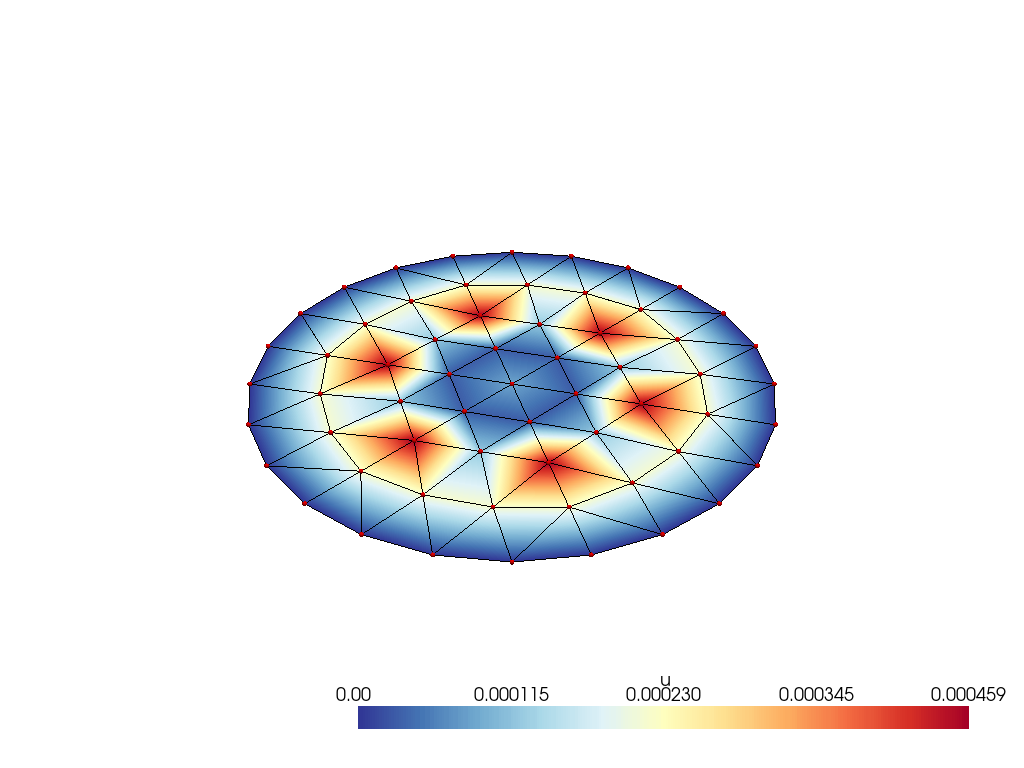

mesh 1, order 19


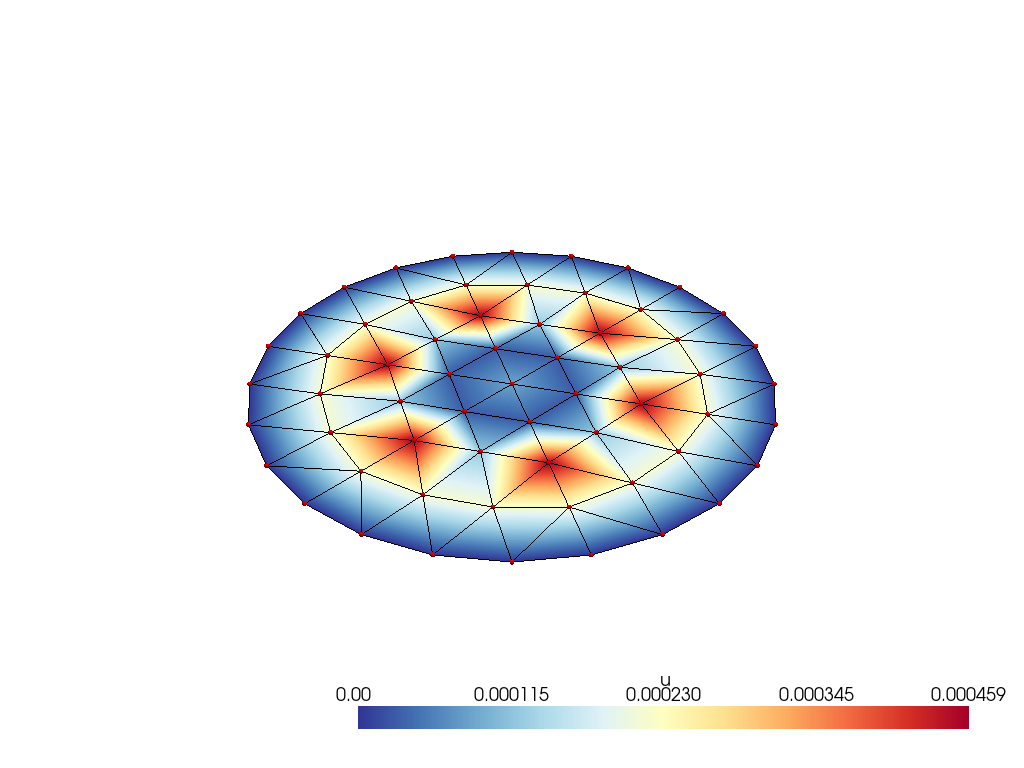

mesh 2, order 2


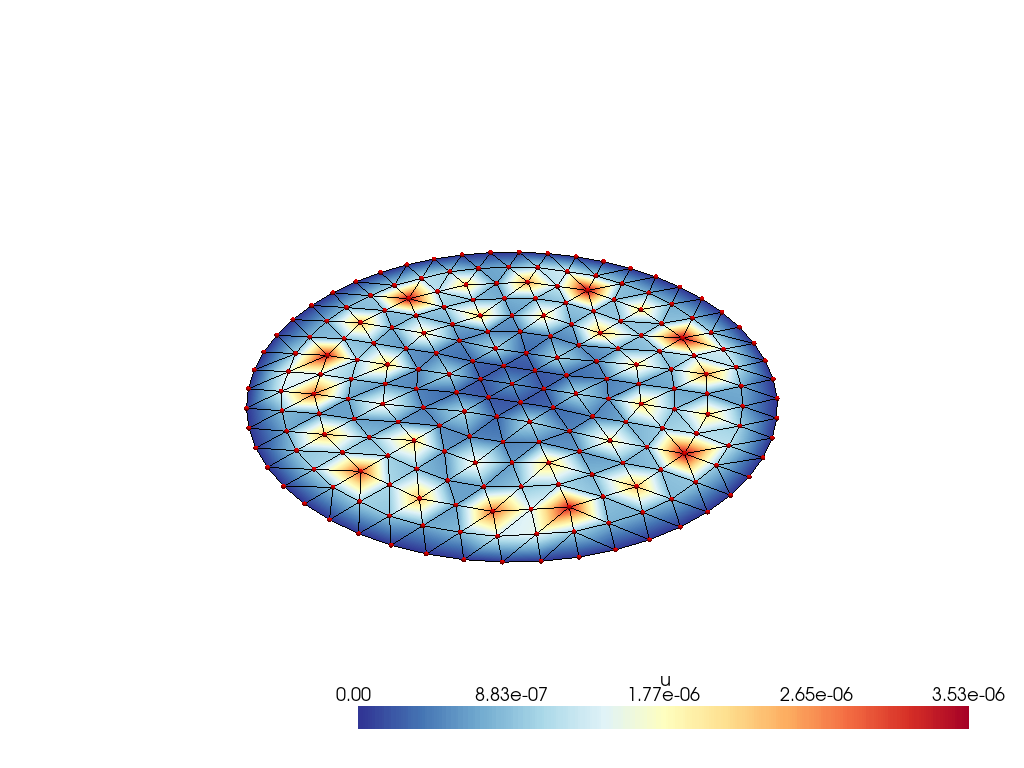

mesh 2, order 5


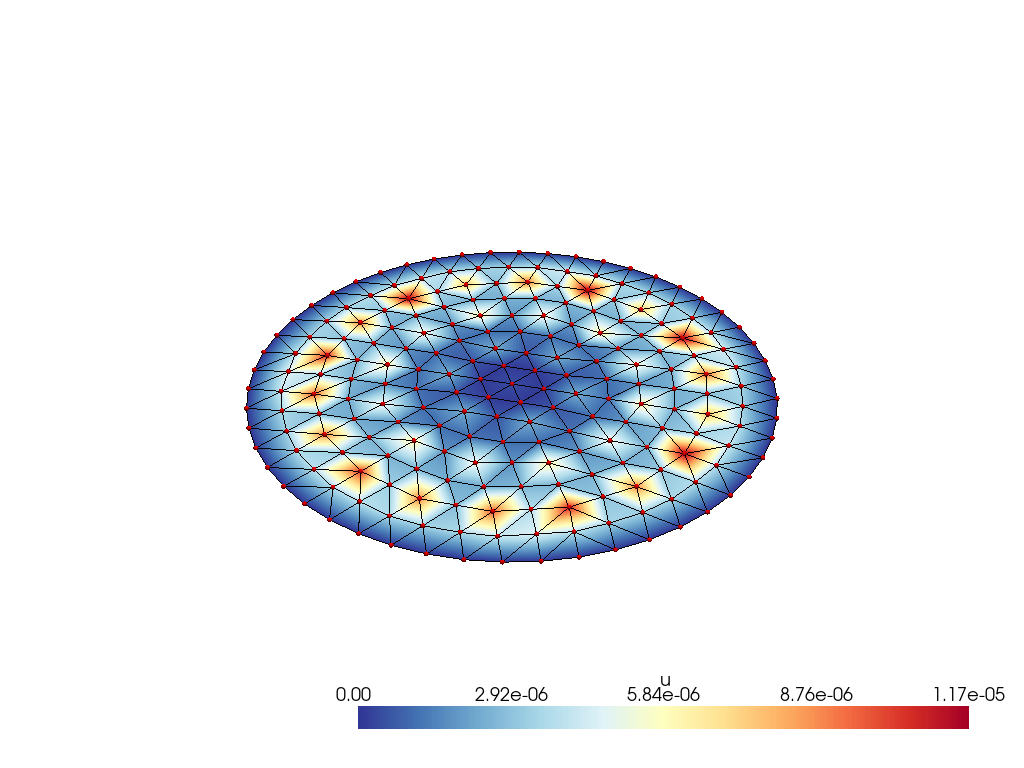

mesh 2, order 8


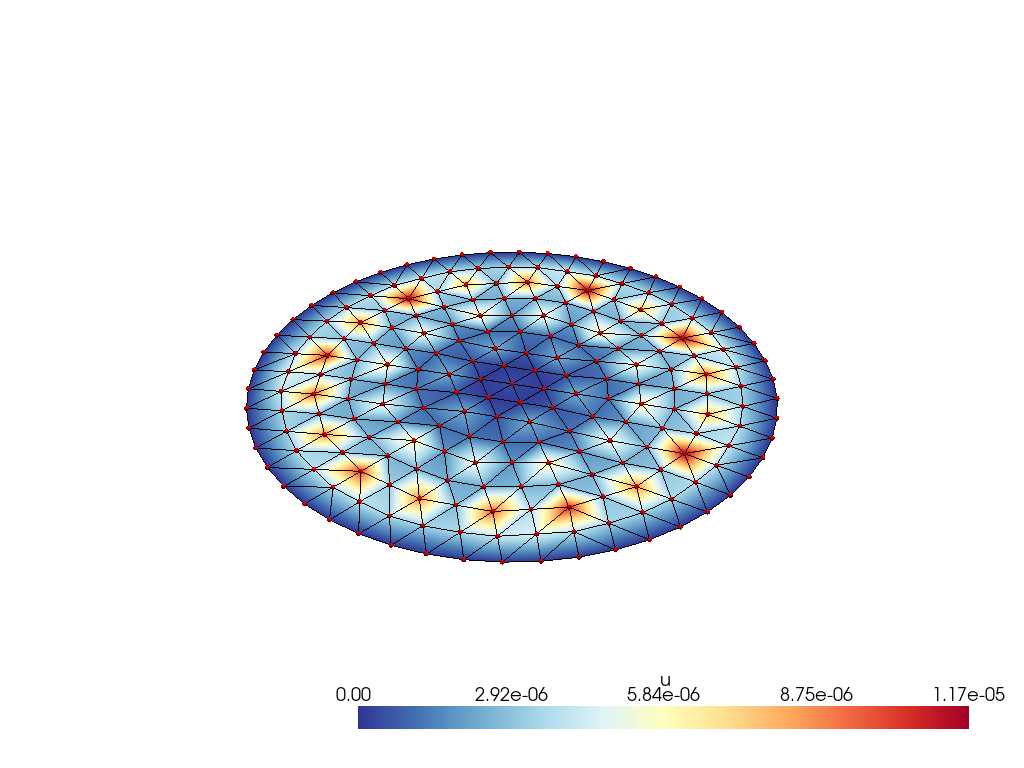

mesh 2, order 13


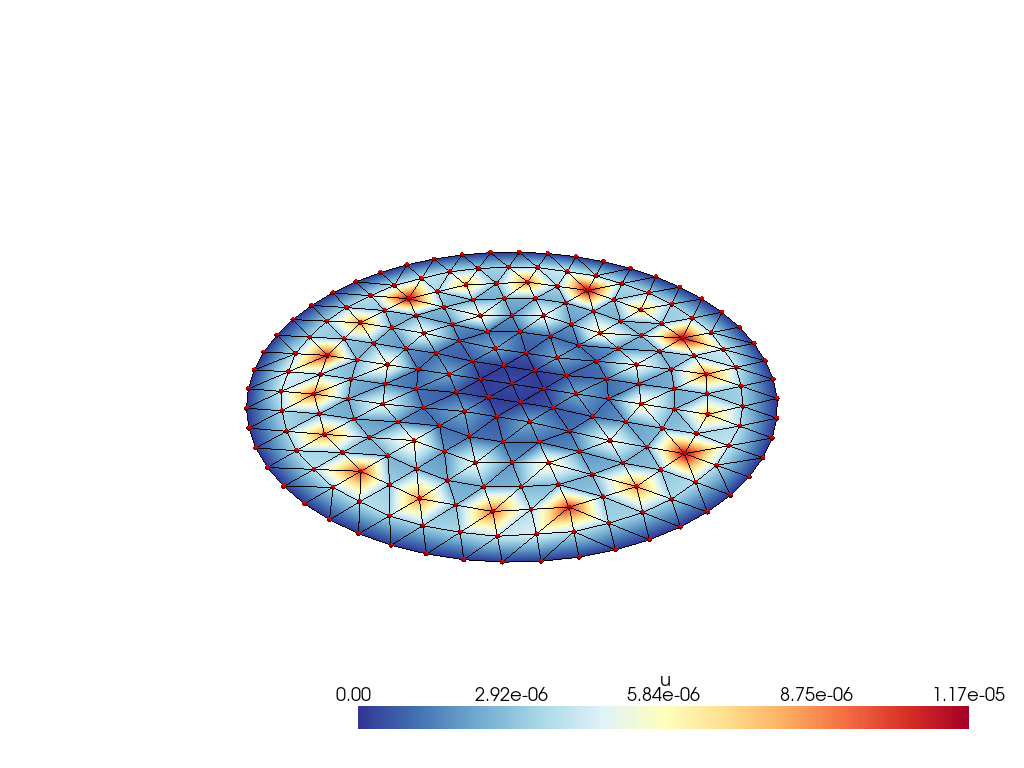

mesh 2, order 19


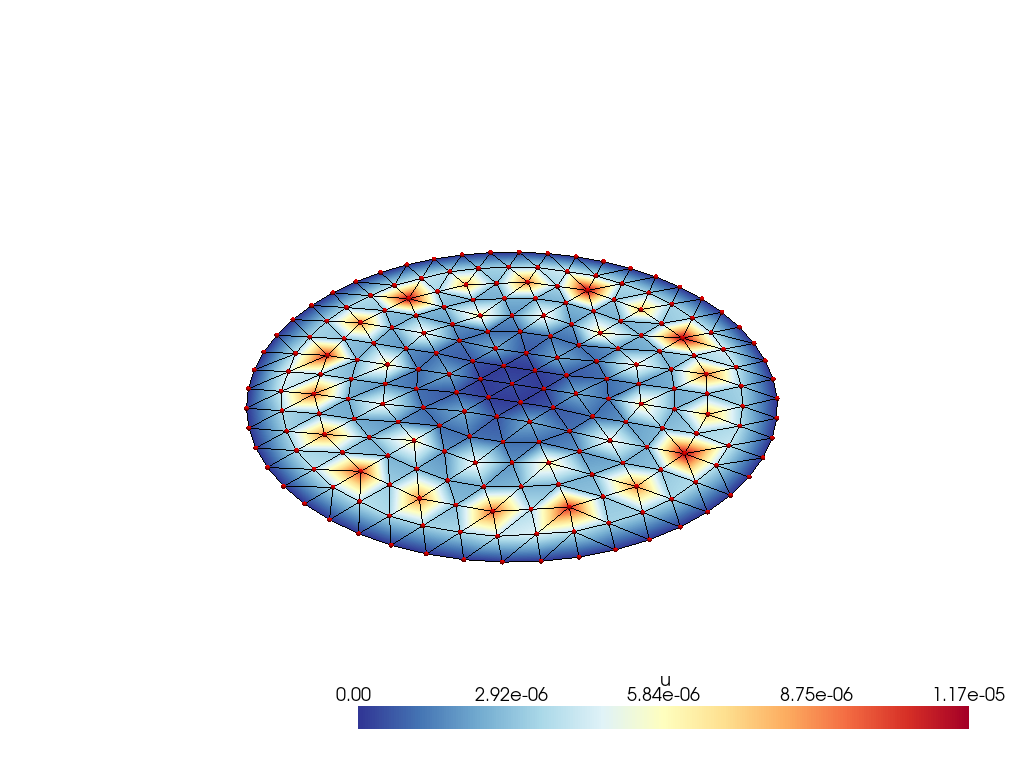

mesh 3, order 2


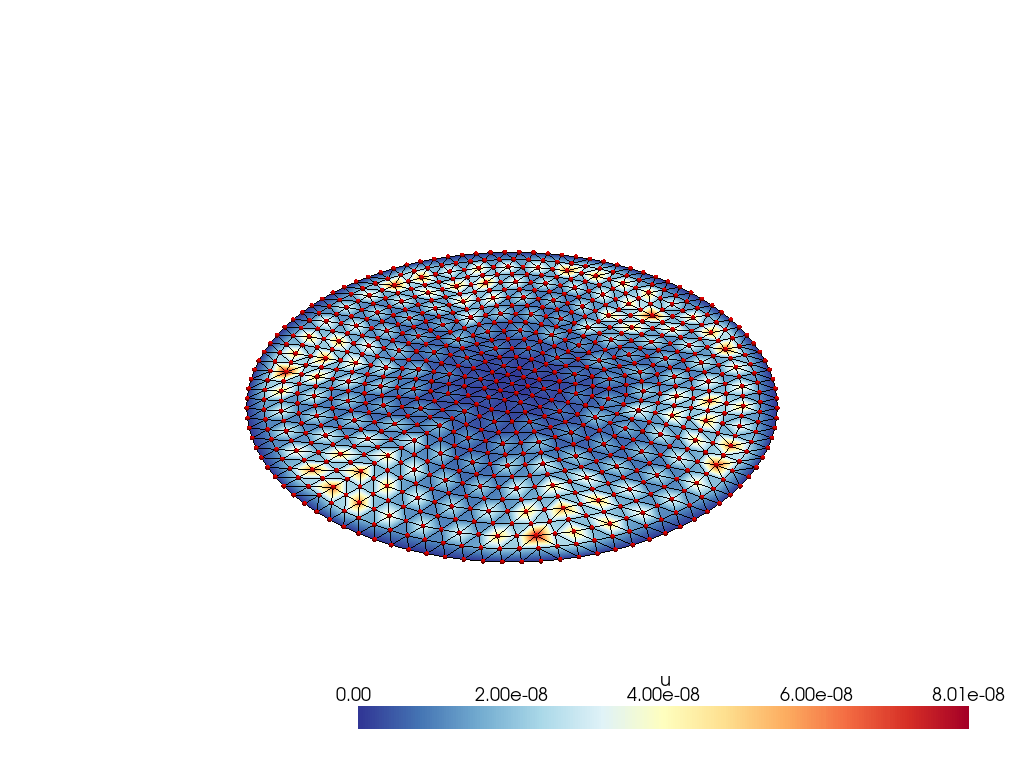

mesh 3, order 5


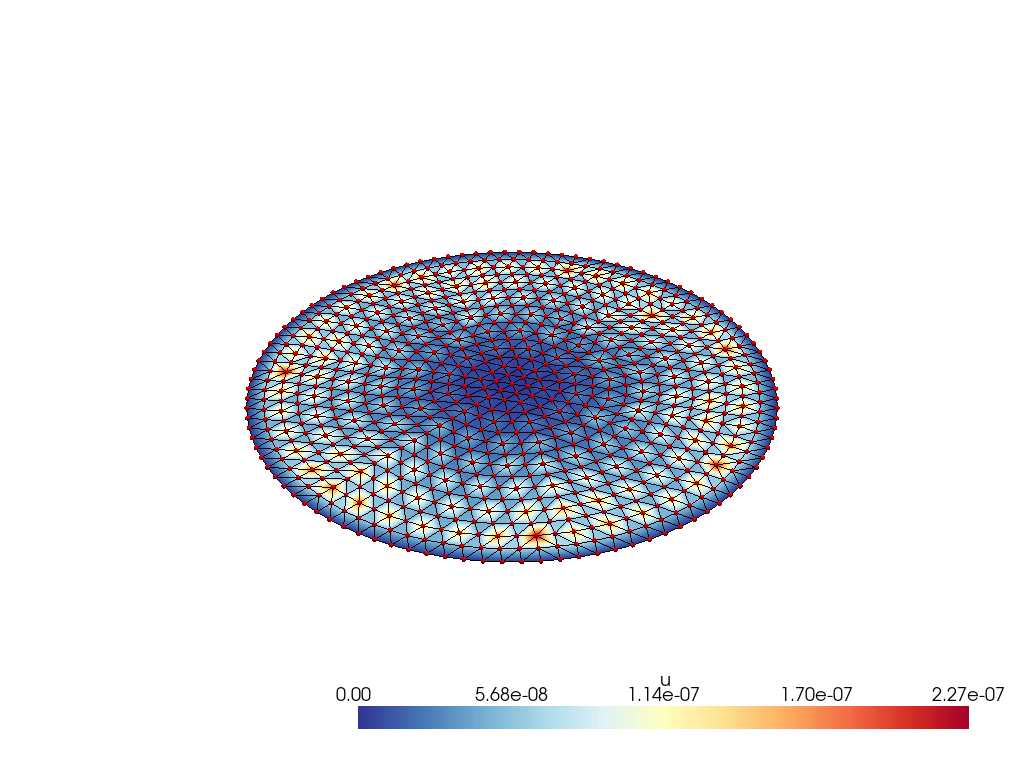

mesh 3, order 8


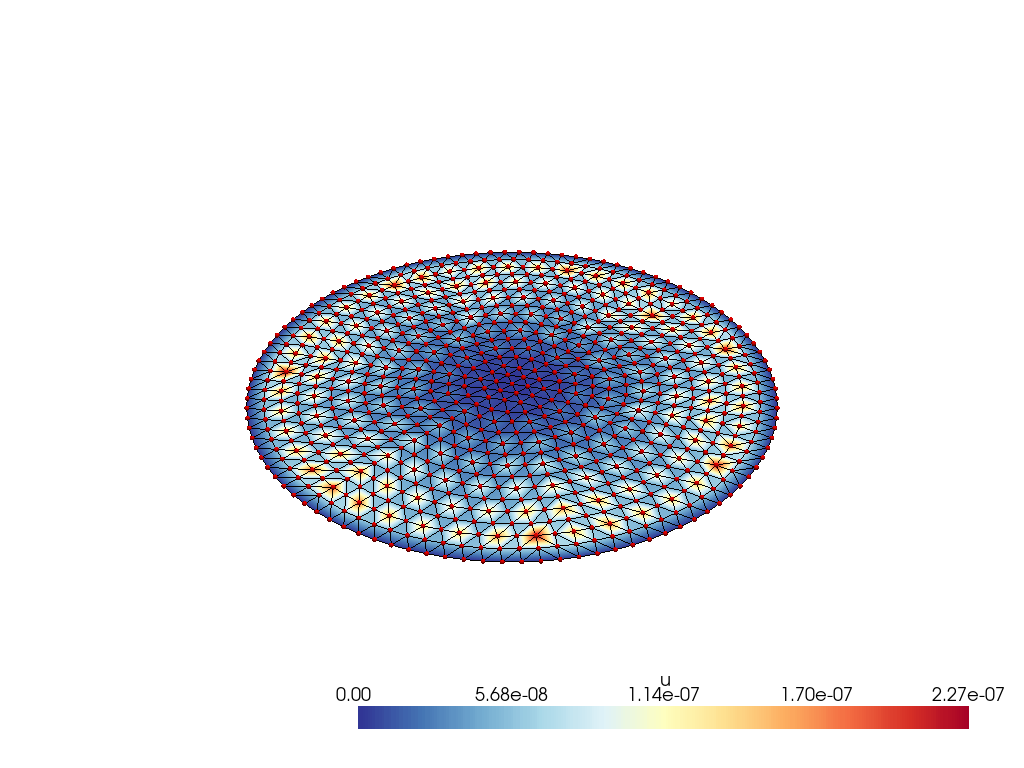

mesh 3, order 13


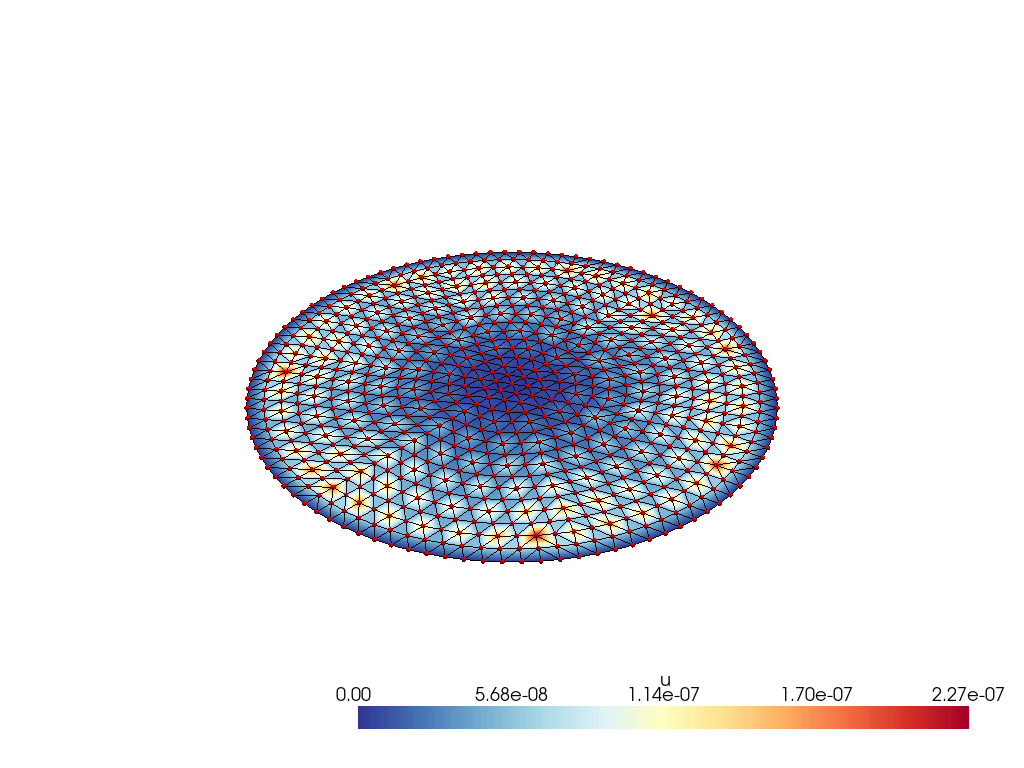

mesh 3, order 19


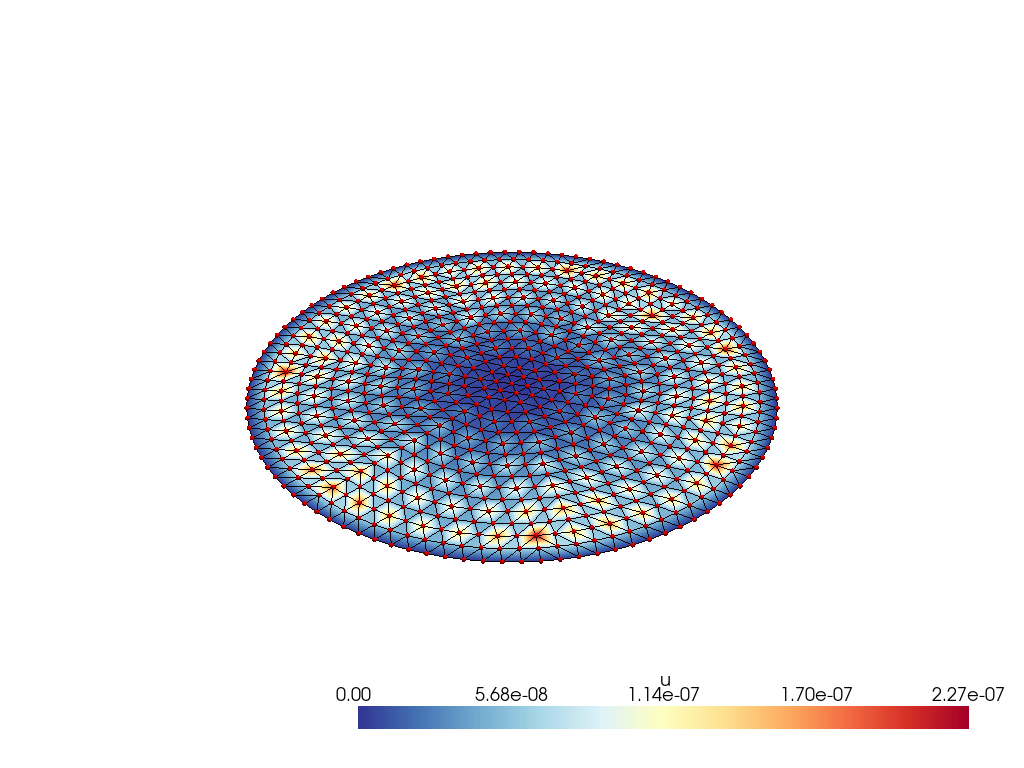

mesh 4, order 2


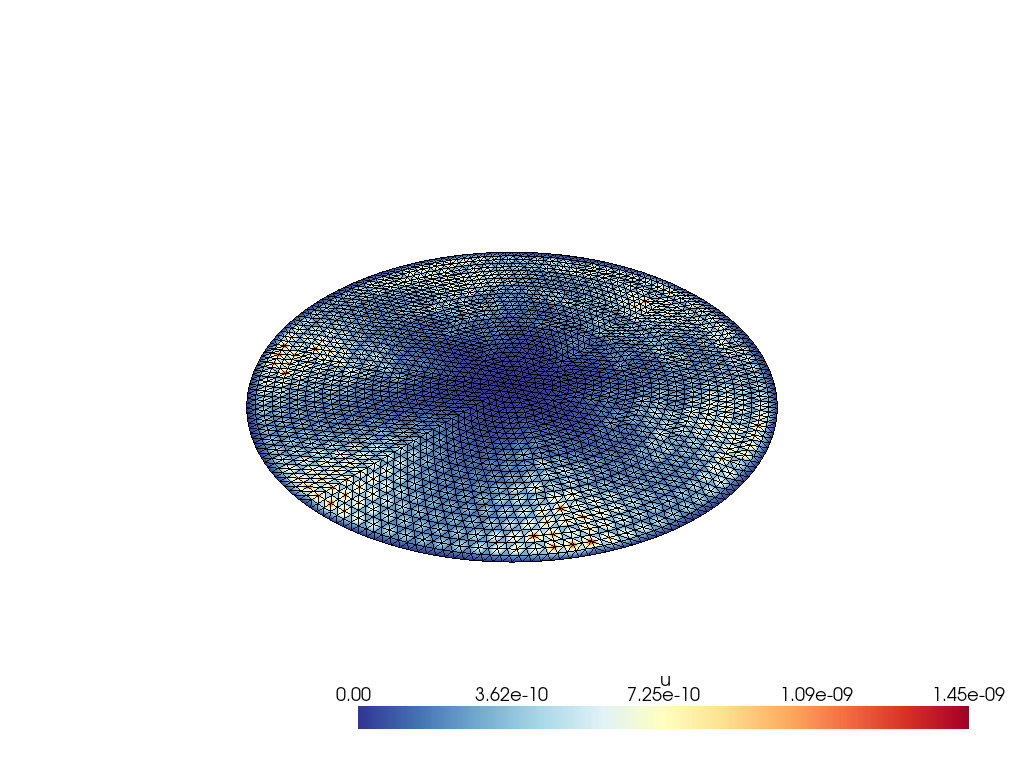

mesh 4, order 5


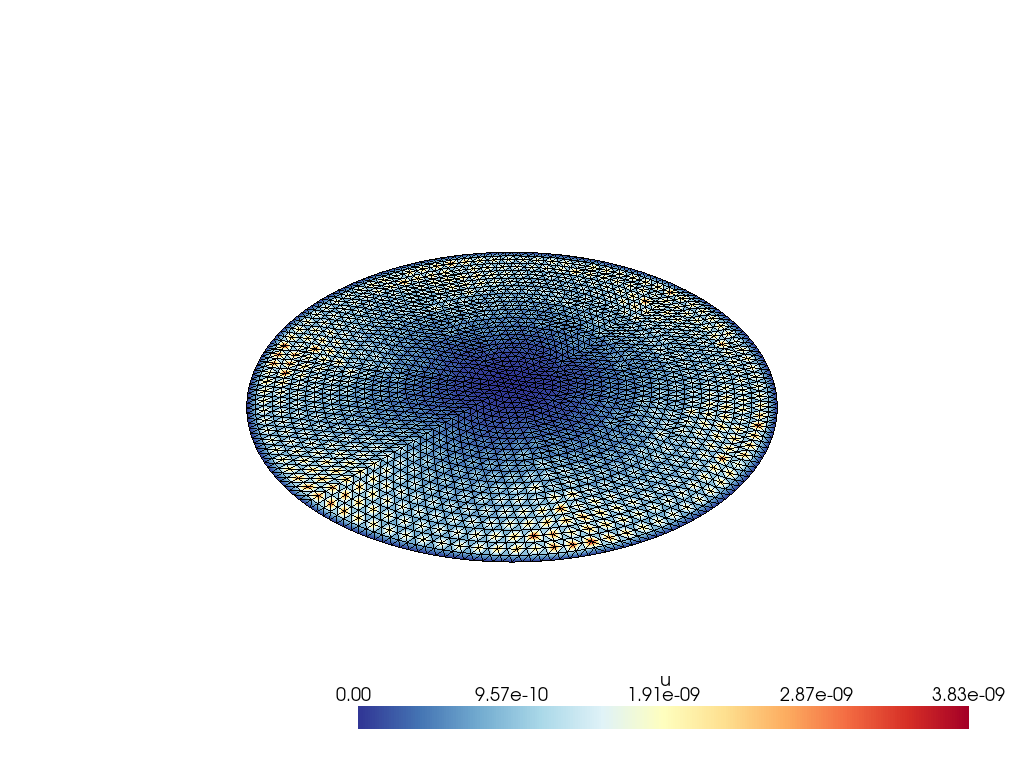

mesh 4, order 8


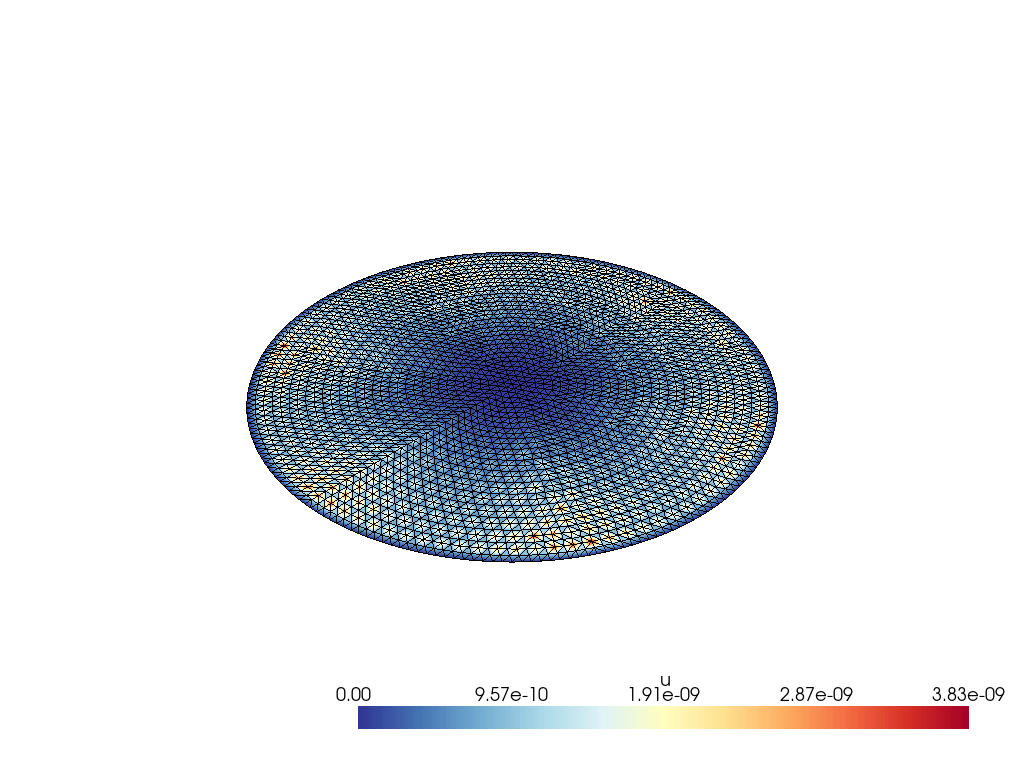

mesh 4, order 13


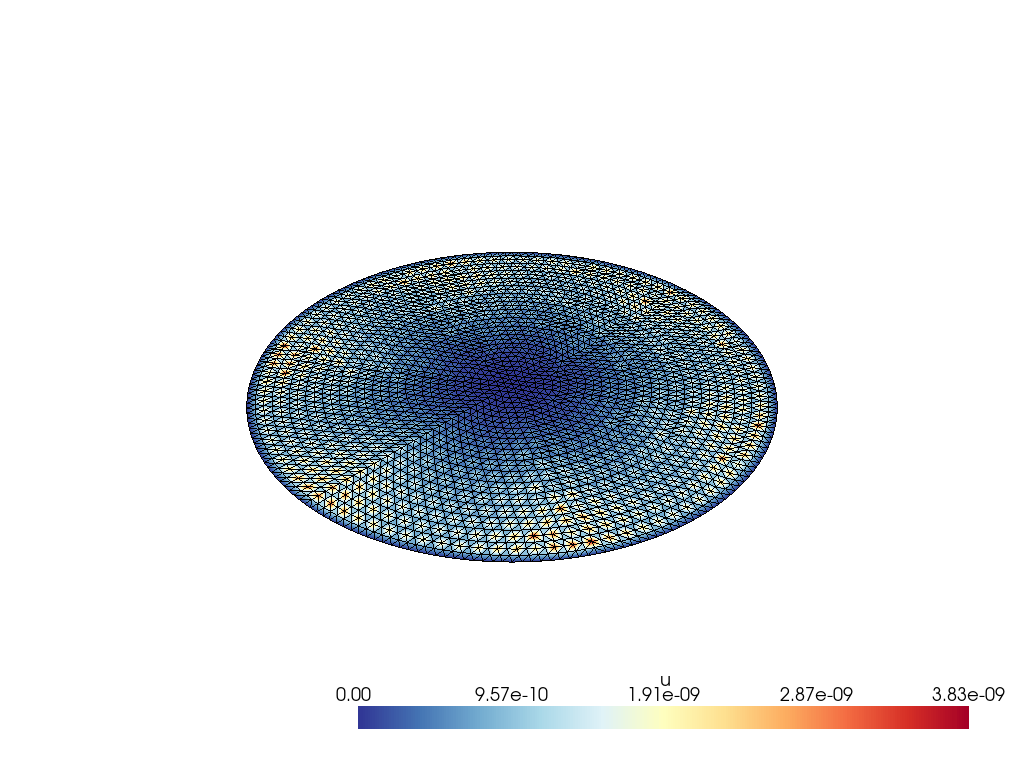

mesh 4, order 19


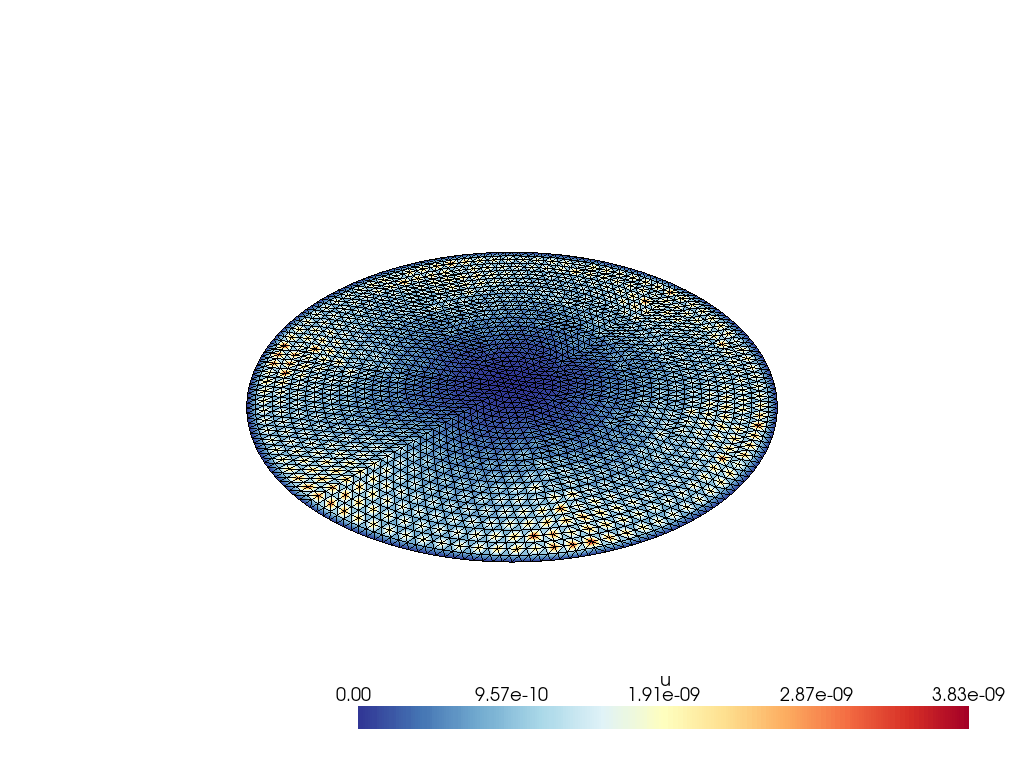

mesh 5, order 2


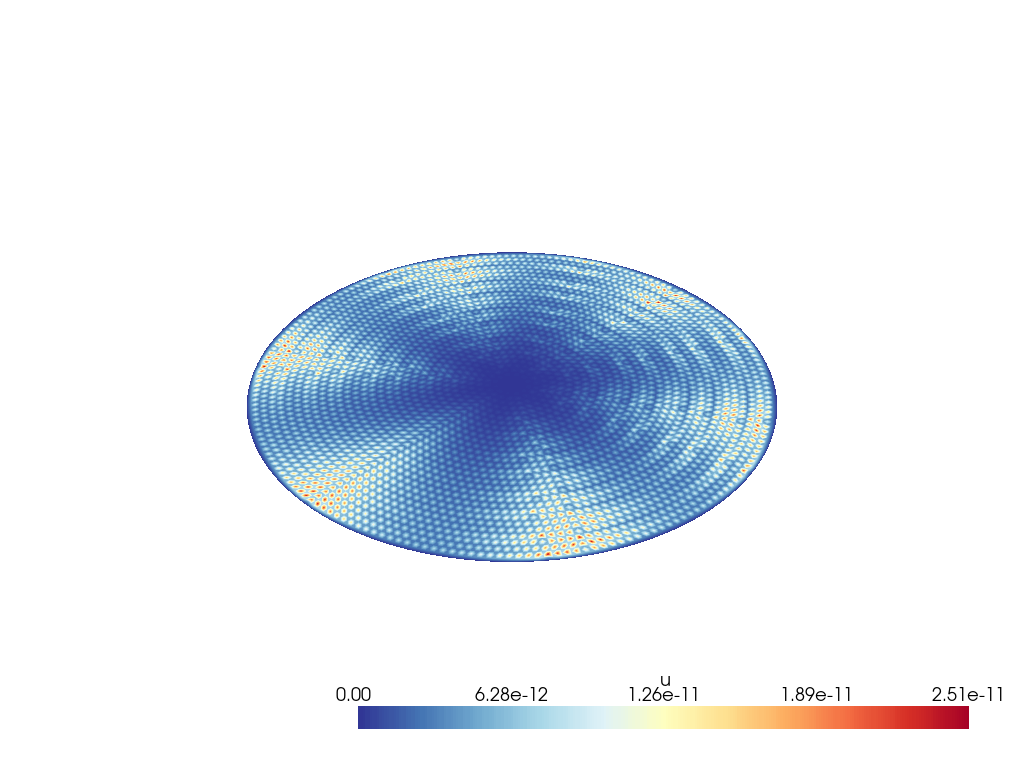

mesh 5, order 5


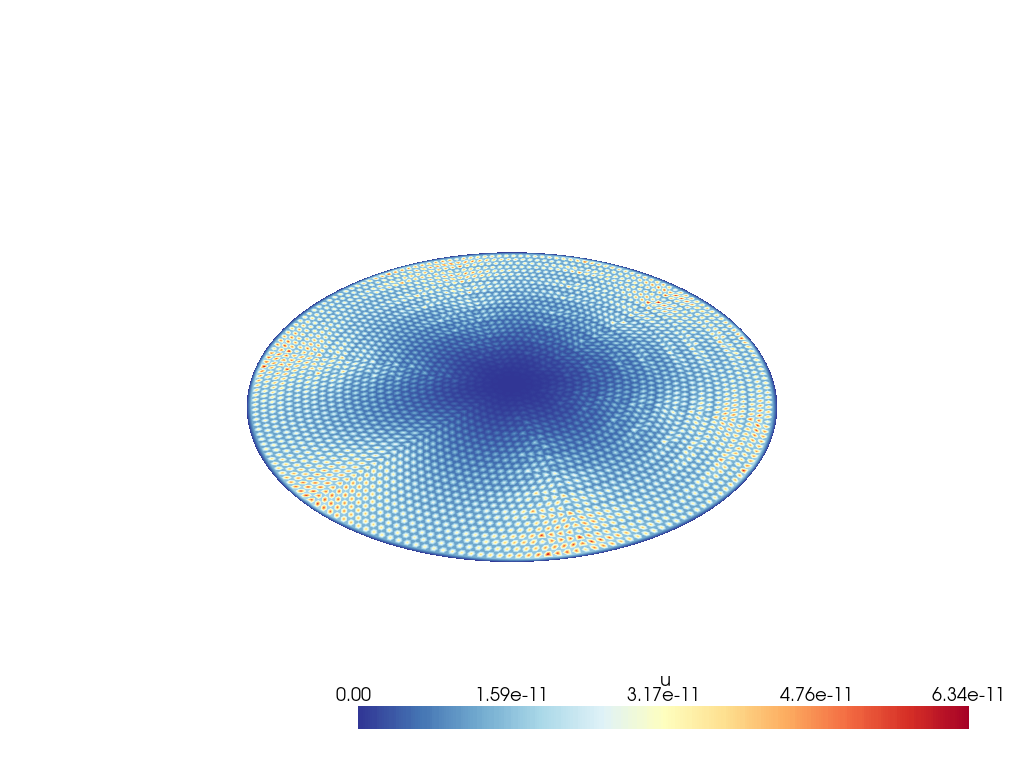

mesh 5, order 8


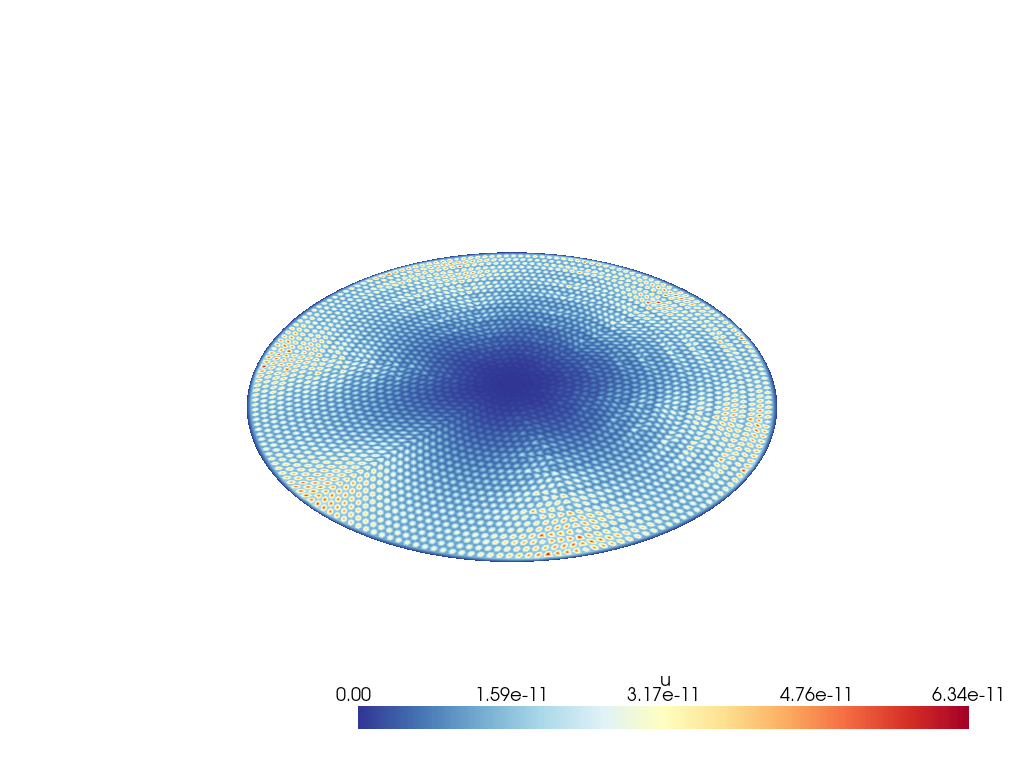

mesh 5, order 13


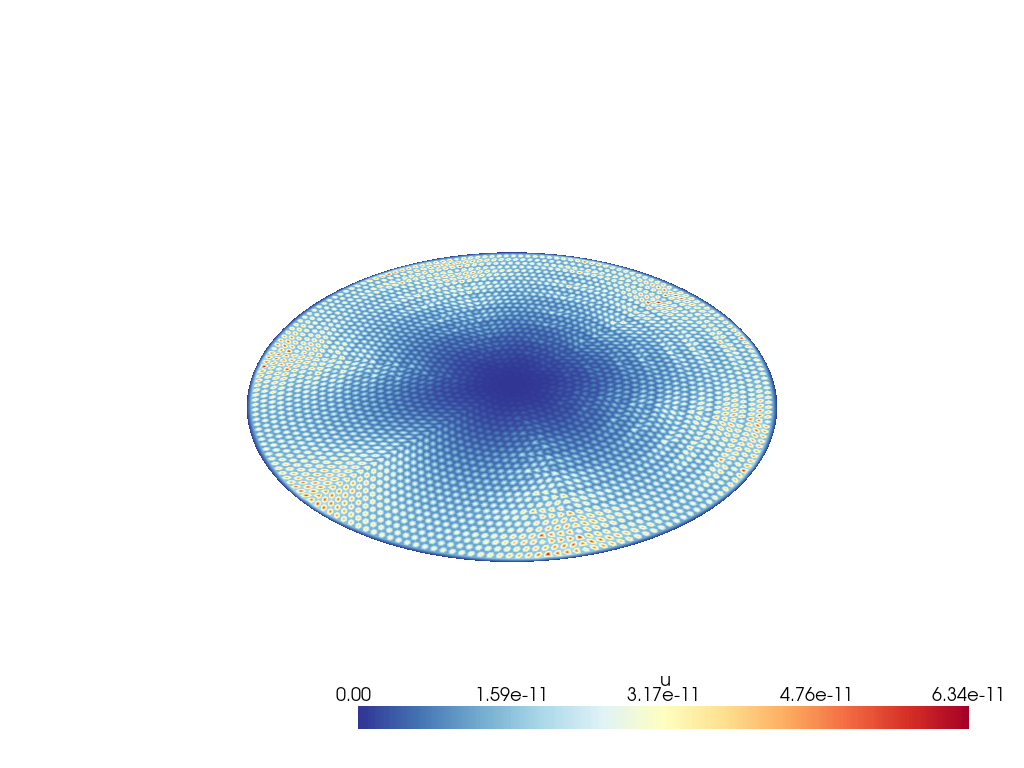

mesh 5, order 19


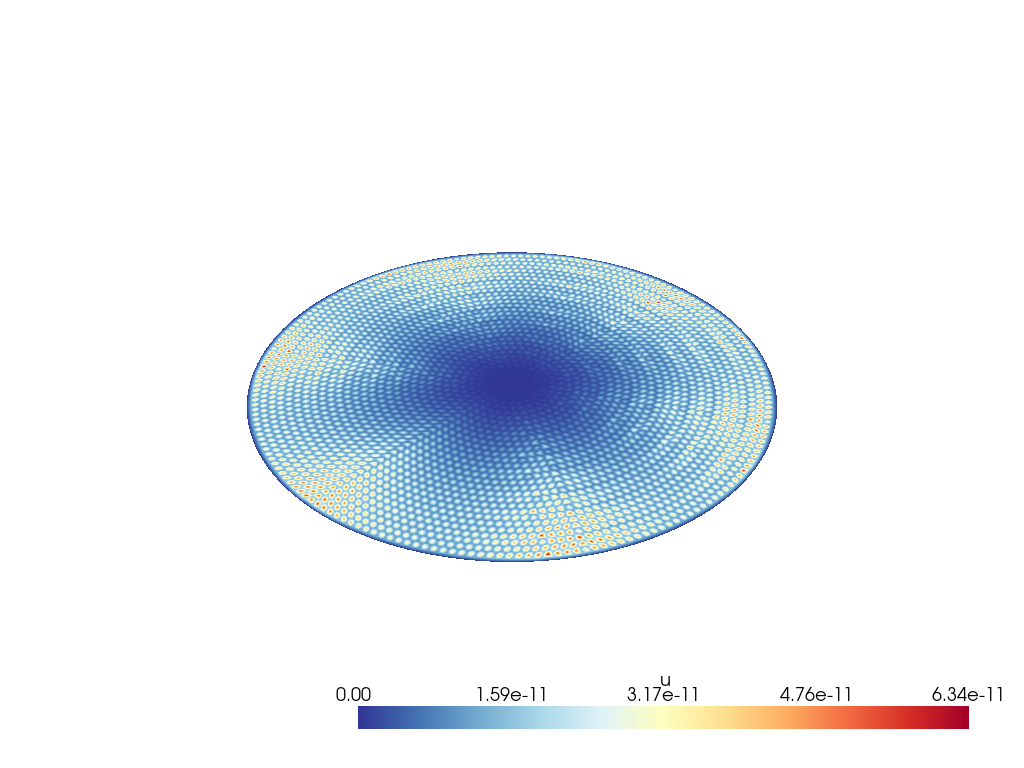

In [7]:
for m in [1,2,3,4,5]:
    model =  anabel.MeshGroup.read(f"../dat/circle_iso/mesh{m}", "m228", cell="triangle6")
    if norm == "H1":
        N = H1
    else:
        N = L2
    E = model.assemble_integral(elem=N(*[lagrange_t6()]*3,u=u))
    for g in [2,5,8,13,19]:
        print(f"mesh {m}, order {g}")
        quad = anon.quad.simplex.Simplex.load(f"gauss{g:02}.m")
        try:
            U_h = anp.load(f"../out/mesh{m}-gauss{g:02}{pblm}.npz")["arr_0"] + 0.0
        except:
            continue

        model.plot(E(U_h,points=quad.points,weights=quad.weights), savefig=f"../img/mesh{m}-gauss{g:02}{pblm}-{norm}.png")

## Error Analysis